<a href="https://colab.research.google.com/github/WizardOfCodes442/student-facial-biometric-project/blob/main/testingcnnwithstudentpictures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


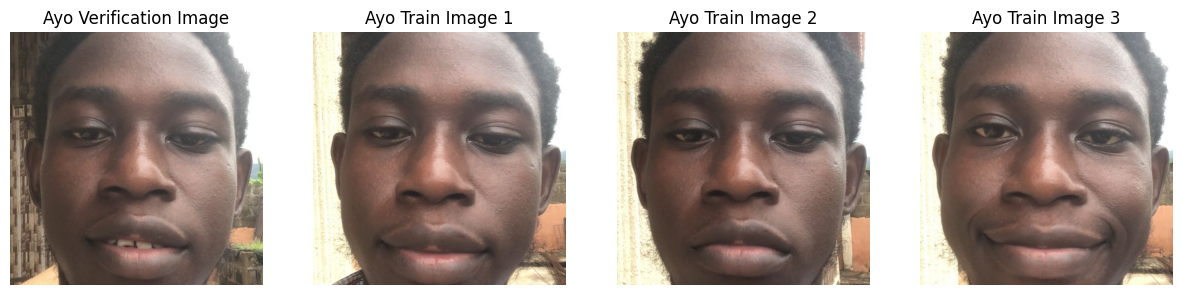

Match for Ayo: Same person, Confidence level = 0.9703895449638367
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


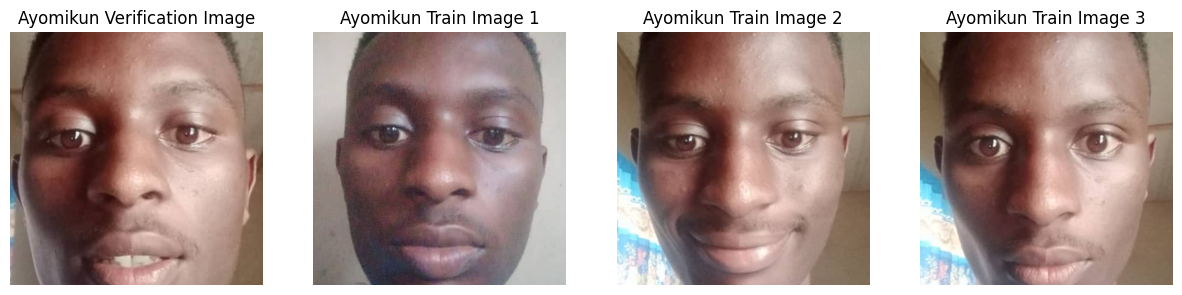

Match for Ayomikun: Same person, Confidence level = 0.9497573375701904
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
No face detected in training image from https://project-space365.s3.amazonaws.com/Damilola4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


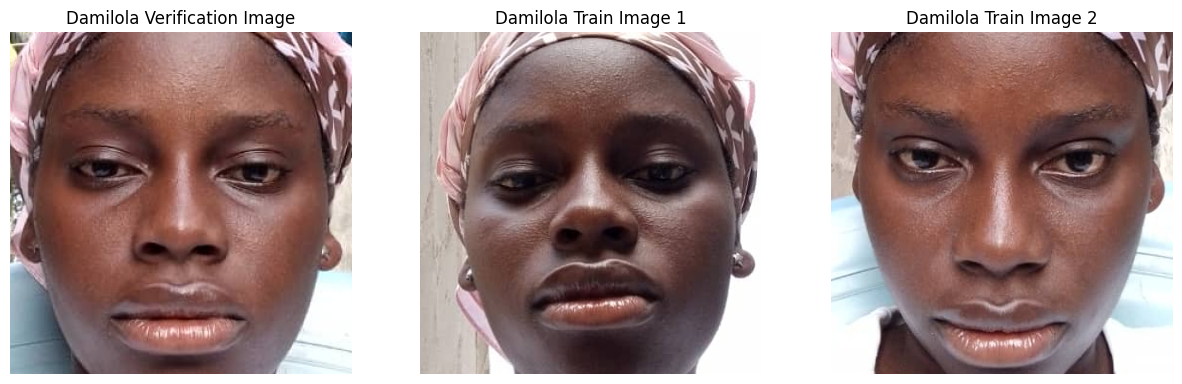

Match for Damilola: Same person, Confidence level = 0.9572815895080566
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


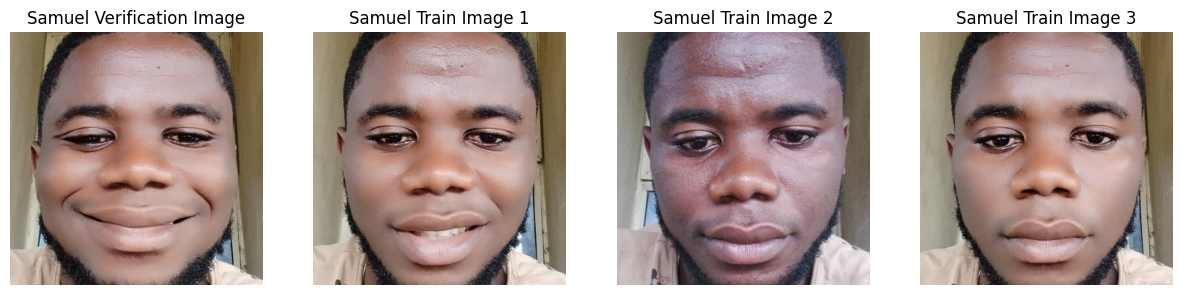

Match for Samuel: Same person, Confidence level = 0.960914134979248
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


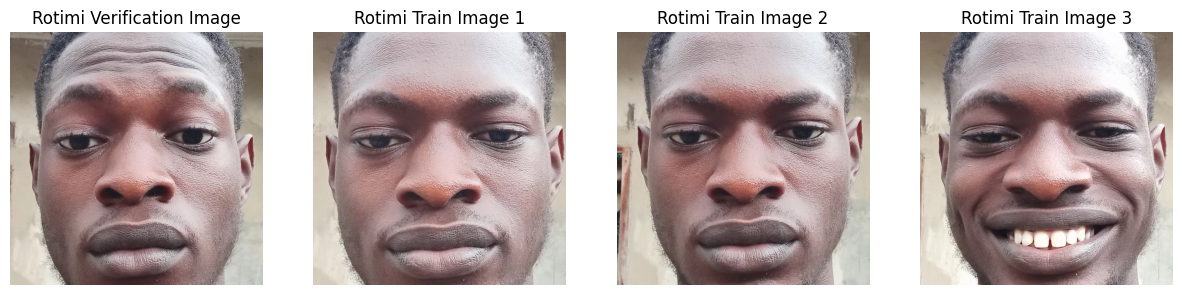

Match for Rotimi: Same person, Confidence level = 0.9736868143081665
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


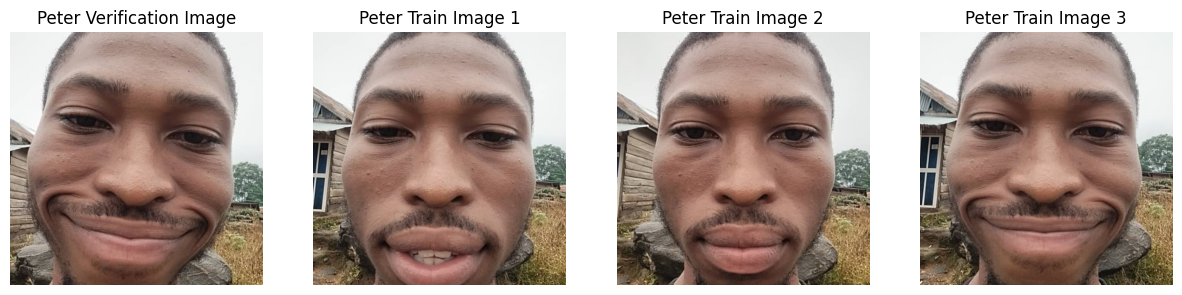

Match for Peter: Same person, Confidence level = 0.9224000573158264


In [6]:
import cv2
import numpy as np
import requests
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras import layers, models
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Load the MobileNetV2 model
def load_model():
    base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(128, activation='softmax')
    ])
    return model

# Download an image from a URL
def download_image(url):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        image = np.asarray(bytearray(response.raw.read()), dtype="uint8")
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)
        return image
    else:
        print(f"Error downloading image from URL: {url}")
        return None

# Preprocess image for the model
def preprocess_image(image):
    resized_image = cv2.resize(image, (224, 224))
    processed_image = preprocess_input(resized_image)
    return processed_image

# Extract face encoding from the image
def extract_face_encoding(model, image):
    processed_image = preprocess_image(image)
    processed_image = np.expand_dims(processed_image, axis=0)  # Add batch dimension
    encoding = model.predict(processed_image)
    return encoding.flatten()

# Load the face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect and extract face from an image
def detect_face(image):
    if image is None:
        return None, None
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_image, 1.1, 4)

    if len(faces) == 0:
        return None, image

    x, y, w, h = faces[0]  # Take the first detected face
    detected_face = image[y:y+h, x:x+w]  # Cropped face
    return detected_face, image[y:y+h, x:x+w]  # Return cropped face and full image

# Show images side by side
def show_images_side_by_side(images, titles=None):
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=(15, 15))
    for i in range(n):
        axes[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        if titles:
            axes[i].set_title(titles[i])
        axes[i].axis('off')
    plt.show()

# URLs for images (replace with your actual URLs)
image_urls = {
    "Ayo": [
        "https://project-space365.s3.amazonaws.com/Ayo1.jpg",
        "https://project-space365.s3.amazonaws.com/Ayo2.jpg",
        "https://project-space365.s3.amazonaws.com/Ayo3.jpg",
        "https://project-space365.s3.amazonaws.com/Ayo4.jpg"
    ],
    "Ayomikun": [
        "https://project-space365.s3.amazonaws.com/Ayomikun1.jpg",
        "https://project-space365.s3.amazonaws.com/Ayomikun2.jpg",
        "https://project-space365.s3.amazonaws.com/Ayomikun3.jpg",
        "https://project-space365.s3.amazonaws.com/Ayomikun4.jpg"
    ],
    "Damilola": [
        "https://project-space365.s3.amazonaws.com/damilola1.jpg",
        "https://project-space365.s3.amazonaws.com/Damilola2.jpg",
        "https://project-space365.s3.amazonaws.com/Damilola4.jpg",
        "https://project-space365.s3.amazonaws.com/Damilola3.jpg"
    ],
    "Samuel": [
        "https://project-space365.s3.amazonaws.com/Samuel1.jpg",
        "https://project-space365.s3.amazonaws.com/Samuel2.jpg",
        "https://project-space365.s3.amazonaws.com/Samuel3.jpg",
        "https://project-space365.s3.amazonaws.com/Samuel4.jpg"
    ],
    "Rotimi": [
        "https://project-space365.s3.amazonaws.com/Rotimi1.jpg",
        "https://project-space365.s3.amazonaws.com/Rotimi2.jpg",
        "https://project-space365.s3.amazonaws.com/Rotimi3.jpg",
        "https://project-space365.s3.amazonaws.com/Rotimi4.jpg"
    ],
    "Peter": [
        "https://project-space365.s3.amazonaws.com/okikipeter1.jpg",
        "https://project-space365.s3.amazonaws.com/okikipeter2.jpg",
        "https://project-space365.s3.amazonaws.com/okikipeter3.jpg",
        "https://project-space365.s3.amazonaws.com/okikipeter4.jpg"
    ]
}

# Load the MobileNetV2 model
model = load_model()

# Function to process and compare faces
def process_and_compare_faces(person_name, urls):
    # Split into training (first 3) and verification (last one)
    train_urls = urls[:3]
    verify_url = urls[3]

    # Load and process the training images
    train_encodings = []
    detected_faces_train = []

    for idx, url in enumerate(train_urls):
        train_image = download_image(url)

        if train_image is None:
            print(f"Failed to download or process training image from {url}")
            continue

        train_face, _ = detect_face(train_image)

        if train_face is not None:
            train_encoding = extract_face_encoding(model, train_face)
            train_encodings.append(train_encoding)
            detected_faces_train.append(train_face)

            # Print the extracted face encoding
            #print(f"Encoding for {person_name} Train Image {idx+1}: {train_encoding[:10]}...")  # Truncated for brevity
        else:
            print(f"No face detected in training image from {url}")

    # Show all detected faces side by side

    # Average the encodings from the 3 training images
    if len(train_encodings) >= 2:
        averaged_encoding = np.mean(train_encodings, axis=0)
        #print(f"\nAveraged Encoding for {person_name}: {averaged_encoding[:10]}...")  # Print the averaged encoding (truncated)
    else:
        print(f"Not enough valid training images for {person_name}.")
        return

    # Load and process the verification image
    verify_image = download_image(verify_url)
    verify_face, _ = detect_face(verify_image)

    if verify_face is None:
        print(f"No face detected in the verification image for {person_name}.")
        return

    # Extract encoding for the verification image
    verify_encoding = extract_face_encoding(model, verify_face)
    #print(f"Encoding for {person_name} Verification Image: {verify_encoding[:10]}...")  # Print the verification encoding (truncated)

    # Show the verification face and training faces side by side
    show_images_side_by_side([verify_face] + detected_faces_train, [f"{person_name} Verification Image", f"{person_name} Train Image 1", f"{person_name} Train Image 2", f"{person_name} Train Image 3"])

    # Compare the averaged encoding with the verification encoding
    similarity = cosine_similarity([averaged_encoding], [verify_encoding])[0][0]

    # Define a threshold (0.9 is often a good threshold for face matching)
    if similarity > 0.9:
        print(f"Match for {person_name}: Same person, Confidence level = {similarity}")
    else:
        print(f"Different people detected for {person_name}")

# Iterate through each person and process their images
for person_name, urls in image_urls.items():
    process_and_compare_faces(person_name, urls)
